Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

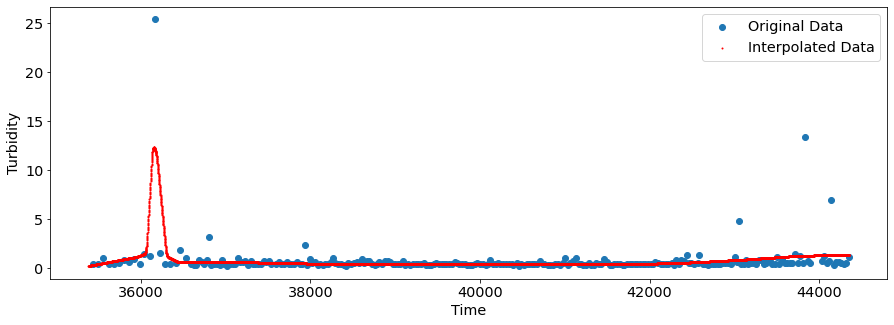

313/313 [==============================] - 0s 330us/step - loss: 2.7814e-17
['loss']


In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelCD01A_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/CD01A.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.2
turbidity_max = 25.4
time_min = 35439.00                     
time_max = 44357.44                                

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [5]:
interpolation = model.predict([0.003363818
,0.009979327
,0.01681909
,0.023658853
,0.030498616
,0.037338379
,0.044290269
,0.050905778
,0.057745541
,0.064585304
,0.071425067
,0.078264831
,0.085216721
,0.09183223
,0.098671993
,0.105511756
,0.112351519
,0.119191282
,0.126143173
,0.951960475
,0.955324293
,0.958800238
,0.238718946
])
interpolation

array([[0.00750276],
       [0.01131927],
       [0.01526513],
       [0.01921102],
       [0.02315692],
       [0.02710374],
       [0.03101392],
       [0.03465057],
       [0.03886059],
       [0.04660874],
       [0.12044001],
       [0.4625402 ],
       [0.40822786],
       [0.1988478 ],
       [0.0385035 ],
       [0.0277647 ],
       [0.01966008],
       [0.01957318],
       [0.01948485],
       [0.0442235 ],
       [0.04442896],
       [0.04464125],
       [0.01465985]], dtype=float32)